In [70]:
# topological sort, create graph o = tanh(w1x1 + w2x2 + b)


import math


class Value:
    def __init__(self, data, _parent=(), _op=''):
        self.data = data
        self._prev = set(_parent)
        self._op = _op
        self.label = ''

    def __repr__(self):
        return f"Value(data={self.data})"

    def __mul__(self, other):
        return Value(self.data*other.data, (self, other), '*');

    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def tanh(self):
        x = self.data;
        t = (math.exp(2*x)-1)/ (math.exp(2*x)+1)
        out = Value(t, (self, ), 'tanh')
        return out 
        

w1 = Value(2); w1.label = 'w1'
x1 = Value(3); x1.label = 'x1'

w2 = Value(1.5); w2.label = 'w2'
x2 = Value(-5.0); x2.label = 'x2'

w1x1 = w1*x1; w1x1.label = 'w1x1'
w2x2 = w2*x2; w2x2.label = 'w2x2'

w1x1w2x2 = w1x1+w2x2; w1x1w2x2.label = 'w1x1 + w2x2'

b = Value(10.0); b.label = 'b'

n = w1x1w1x1 + b; n.label = 'n'

o = n.tanh(); o.label = 'o'
o

Value(data=0.999999917201249)

In [23]:
# build and print graph use graphviz to vitrulize the graph

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

def draw_dot_vertically(root):
  dot = Digraph(format='svg') # by default, graphs are laid out from top to bottom 
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [23]:
# build and print graph use graphviz to vitrulize the graph

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

def draw_dot_vertically(root):
  dot = Digraph(format='svg') # by default, graphs are laid out from top to bottom 
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

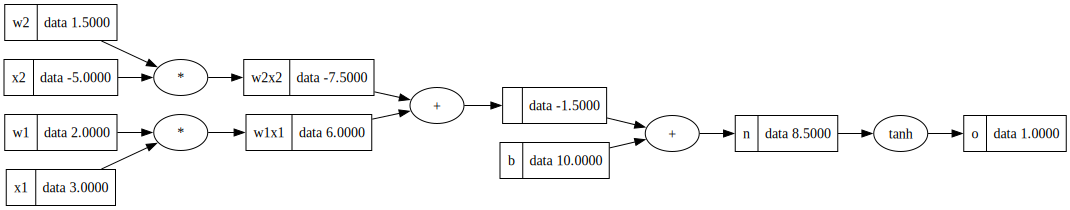

In [71]:
draw_dot(o)

In [88]:
# use Adjacency list to represent Value data struct
# o = tanh(w1x1+w1x2 + b)
output = {
    'o': ['n'],
    'n': ['w1x1w2x2', 'b'],
    'w1x1w2x2': ['w1x1', 'w2x2'],
    'b': [],
    'w1x1': ['w1', 'x1'],
    'w2x2': ['w2', 'x2'],
    'w1': [],
    'x1': [],
    'w2': [],
    'x2': [],
}


# depth frist search 
# input, graph: output 
# output, [w1, x1, w1x1, x2,w2, w2x2, w1x1w2x2, b, n, o]
result = [];
# start_node = o
visited = set()
def build_result(g, n):
    if n not in visited:
        visited.add(n)
        for nei in g[n]:
            build_result(g, nei)
        result.append(n)

build_result(output, 'o')
print(result)




['w1', 'x1', 'w1x1', 'w2', 'x2', 'w2x2', 'w1x1w2x2', 'b', 'n', 'o']


In [ ]:
#breath first search 
# input graph, output
# output, [o, n, w1x1w2x2, b, w2x2, w1x1, w1, x1, w2, x2]
# start with node o

result = []
build_result(output, 'o')
print(result)

def build_result(g, n):
    # get all the child around this node 
    allnodes = []
    result.append(n)
    for child in g[n]:
        allnodes.append(child)
        



# topological sort 

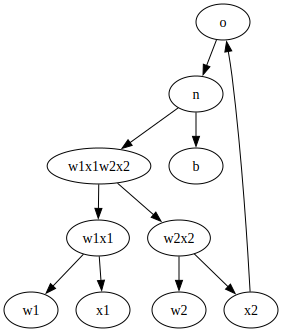

In [79]:
from graphviz import Digraph
g = Digraph(format="svg")
for node in output:
    for nei in output[node]:
        g.edge(node, nei)

g

In [ ]:
neuron = {
    o: {op: 'tanh', oprands: [n], label: 'o'},
    n: {op: '+', oprands: [w1x1w2x2, b], label: 'n'},
    w1x1w2x2: {op: '+', oprands: [w1x1, w2x2], label: 'w1x1w2x2'}
    b: {op: '', oprands: [], label: 'b'}
    w1x1: {op: '*', oprands: [w1, x1], label: 'w1x1'}
    w2x2: {op: '*', oprands: [w2, x2], label: 'w2x2'}
    w1: {op: '', oprands: [], label: 'w1'}
    x1: {op: '', oprands: [], label: 'x1'}
    w2: {op: '', oprands: [], label: 'w2'}
    x2: {op: '', oprands: [], label: 'x2'}
}

In [58]:
#use some common python to represent graph:

# adjacency lists 
# adjacency matrices(2d arrays)
# dictionary 

# things has relationship with each other, the relationship is edges, the things are vertices or nodes



graph1 = {
    'A': [],
}

xzzzzzzzzzzzzzzzzzzzz = {
    'A': ['B', 'C'],
    'B': [],
    'C': [],
}

# graph3= {'A': {'B': {}, 'C': {}}
graph3 = {
    'A': {'B': {}, 'C': {}}
}

topo = [] 
# graph1 output [A]
# graph2 output [B, C, A]
# graph3 output [B, C, A]

def build_topo(g, n):
    # if g node n has child, go build it, otherwise, do nothing 
    for child in g[n]:
        print("child is: ", child)
        build_topo(graph, child)
    # once build child, add n into topo list 
    topo.append(n)


def build_topo1(g):
    # if g node n has child, go build it, otherwise, do nothing 
    for child in g:
        print("child is: ", child)
        build_topo1(child)
    # once build child, add n into topo list 
    topo.append(g)

# start topological sort, start with node 'A'
build_topo1(graph3)


# graph2 = {
#     'A': ['B', 'C', 'E'],
#     'B': ['D', 'E'],
#     'C': [],
#     'D': [],
#     'E': [],
# }

topo


child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A
child is:  A

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
# traverse the graph o 



In [ ]:
# vitulize the graph o 

In [87]:
result = (3**0.0001 - 1) / 0.0001
result

1.0986726383266365

In [ ]:
# array 

1. 1. Two Sum

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

 

Example 1:

Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
Example 2:

Input: nums = [3,2,4], target = 6
Output: [1,2]
Example 3:

Input: nums = [3,3], target = 6
Output: [0,1]
 

Constraints:

2 <= nums.length <= 104
-109 <= nums[i] <= 109
-109 <= target <= 109
Only one valid answer exists.
 

Follow-up: Can you come up with an algorithm that is less than O(n2) time complexity?
        

In [2]:
# look for pair number from unseen numbers, current number right side 

from typing import List

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        # i = 0
        # j = 1
        # for i=0, i<=nums.len i++:
        #     if (nums[i] + nums[j]) == target:
        #         return [i, j]
        #     j++
        for i in range(len(nums)): 
            for j in range(i+1, len(nums)):
                if nums[i] + nums[j] == target:
                    return [i, j]
        return []

# how to iterate through a list of numbers with index?
# how to compare two number values equals to each other 
# 
# The range() function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and ends at a specified number.
# however it is possible to specify the starting value by adding a parameter: range(2, 6), which means values from 2 to 6 (but not including 6):

        

nums = [2,7,11,15]
target = 9
s = Solution()

result = s.twoSum(nums, target)
result 

[0, 1]

In [5]:
# improve time and space complexity from O(n^2) to O(n), look for pair number from seen numbers, cur number left side 

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        secondnum = {}
        for i, x in enumerate(nums):
            secondnum[x] = i
            
        for i, x in enumerate(nums):
            y = target - nums[i]
            if y in secondnum and secondnum[y] != i:
                return [i, secondnum[y]]

        return []


nums = [2,7,11,15]
target = 9
s = Solution()

result = s.twoSum(nums, target)
result 

[0, 1]

In [ ]:
# a better way, to iterate only once, and find the two index of two number sum is target 
Still compare all pairs, but instead of iterating, change to searching 
one way current number compare to all unvisited right side, 
The other way compare current number to all visited number form left side  
Switch from iterating O(n) to searching  O(1), take advantage of of hash map 

target: 13
input nums: [2, 7, 5, 9]

map{}
i: 0, num: 2, look targe - current = 13-2 = 11, map[11], not find continue 

add i, num, into map {2: 0, }
i: 1, num: 7, look t-c = 13-7 = 5, map[5], not exist, continue 

update map {2: 0, 7: 1}
i: 2, num: 5, look t-c = 13-5 = 7, map[7], exit, return [i, map[7]]



The idea of using a hash map for optimization is very common in problems where you need to keep track of information you’ve already seen 
(like in Two Sum, finding pairs, or solving problems involving counting frequencies).

It becomes intuitive over time: Once you solve a few problems with hash maps, 
the idea of using them for “search-as-you-go” becomes second nature.


In [ ]:
2. 3. Longest Substring Without Repeating Characters

Given a string s, find the length of the longest substring without duplicate characters.

Example 1:

Input: s = "abcabcbb"
Output: 3
Explanation: The answer is "abc", with the length of 3.
Example 2:

Input: s = "bbbbb"
Output: 1
Explanation: The answer is "b", with the length of 1.
Example 3:

Input: s = "pwwkew"
Output: 3
Explanation: The answer is "wke", with the length of 3.
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.
 

Constraints:

0 <= s.length <= 5 * 104
s consists of English letters, digits, symbols and spaces.

In [ ]:
5. Longest Palindromic Substring

Given a string s, return the longest palindromic substring in s.

 
Example 1:
Input: s = "babad"
Output: "bab"
Explanation: "aba" is also a valid answer.

Example 2:
Input: s = "cbbd"
Output: "bb"
 

Constraints:

1 <= s.length <= 1000
s consist of only digits and English letters.

In [ ]:
 # frist try myself, hahahah
Class Solution:
    def lps(string):
        # need a map, key is the len, value is the string, sorted by the key, what data type can be?
        reuslt = {};
        for i, c in string:
            for i+1, c in string:
                ltor = string[i, i+1]
                rtol = string[i, i+1].reverse
                if (ltor == rtol) result[ltor.len] = ltor
        return result[longest]


Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 
"bab"



In [12]:
s = 'abba'
def traverse(s):
    for i in range(len(s)):
        print(s[i]);
traverse(s)  
    

a
b
b
a


In [11]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            for j in range(i, n):
                ltor = s[i:j+1]
                rtol = ltor[::-1]
                if (ltor == rtol) and len(result) < len(ltor):
                    result = ltor
        return result
        

Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 

'bab'

In [ ]:
class Solution:
    def lps(self, s: str) -> str:
        result = ""
        n = len(s)
        for i in range(n):
            if (i-j >= 0 && i+k < len(n)):
                lstr = s[i-j:i+j]
                while (lstr ==  lstr[::-1]):
                    
                if (lstr == rstr) and len(result) < len(ltor):
                result = ltor
        return result
        

Input: s = "babad"
al = Solution()
result = al.lps(Input)
result 

In [ ]:
Knowledge:

Python strings are immutable.
That means you can’t change them in place. Most string operations create a new string object (i.e., allocate new memory and copy characters).

What makes new copies:

Slicing: s[i:j] builds a new string of length j-i.

Reversing with slicing: s[::-1] builds a new reversed string.

Concatenation / join / replace / lower / upper / strip / etc.: all return new strings.

Indexing: s[k] returns a 1-char string (a new object, although very small; CPython may reuse some tiny strings via interning, but don’t rely on it).